In [1]:
!module unload python

In [2]:
!module load python

load python 3.7.1.
 /cm/shared/apps/torque/6.1.1/sbin /cm/local/apps/environment-modules/4.0.0/bin /opt/ibutils/bin /opt/dell/srvadmin/bin /cm/shared/apps/slurm/17.11.12/sbin /usr/lib64/qt-3.3/bin /cm/shared/apps/torque/6.1.1/bin /cm/shared/apps/slurm/17.11.12/bin


In [3]:
%%bash
python -V

Python 2.7.5


In [4]:
#check installed modules
import platform
print(platform.python_version())


3.7.1


In [5]:
import os
os.chdir("/path/")
cwd = os.getcwd()
print(cwd)

/path


In [6]:
from pandas_plink import read_plink1_bin

In [7]:

#G = read_plink1_bin("chr11.bed", "chr11.bim", "chr11.fam", verbose=False)
#print(G)

In [8]:
#pip install git+https://github.com/mwaskom/seaborn.git --user

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

In [10]:
data = pd.read_csv('maf0.44_pca.eigenvec', sep=" ", header=None)

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,AS01,HAPmap3_box1_A1_AS01_M40,-0.017016,0.039841,-0.019496,0.021301,-0.011318,-0.002571,0.001990,-0.012727,...,0.015052,-0.016558,0.043699,0.029039,0.007064,-0.005738,0.017708,-0.004902,-0.009387,0.015204
1,AS01,HAPmap3_box1_A2_AS01_F10,-0.012701,0.050958,-0.016833,0.020551,-0.011903,-0.014459,0.003725,-0.027741,...,0.003590,-0.004077,0.061947,0.031070,0.005960,0.003528,0.020139,-0.015365,-0.005255,0.013570
2,AS01,HAPmap3_box1_B1_AS01_M41,-0.015573,0.047127,-0.016927,0.024422,-0.006959,0.001367,-0.000013,-0.004755,...,0.014510,-0.004937,0.056771,0.025942,0.004375,-0.005400,0.022090,0.002342,-0.006973,0.023676
3,AS01,HAPmap3_box1_B2_AS01_F11,-0.014758,0.047380,-0.026373,0.023532,-0.003824,-0.014538,-0.011125,-0.020182,...,0.000960,-0.021055,0.059833,0.029430,0.010769,-0.001006,0.015372,0.002151,-0.008891,0.011594
4,AS01,HAPmap3_box1_C1_AS01_M42,-0.016032,0.046680,-0.021325,0.027425,-0.012930,-0.004299,-0.002358,-0.011428,...,0.017753,-0.014891,0.060622,0.036253,0.007289,0.000913,0.013351,0.004180,-0.010911,0.026870


In [12]:
# Get population info
pheno = pd.read_csv('pheno.txt', sep=" ", header=None)
#mergedData <- dplyr::left_join(eigenvec_table, pheno, by = c("V1" = "FID", "V2" = "IID"))


In [13]:
pheno.rename(columns={0: 'FID'}, inplace=True)
data.rename(columns={0: 'FID'}, inplace=True)
pheno.rename(columns={1: 'IID'}, inplace=True)
data.rename(columns={1: 'IID'}, inplace=True)
#data.shape

In [14]:
data.head()

,FID,IID,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,AS01,HAPmap3_box1_A1_AS01_M40,-0.017016,0.039841,-0.019496,0.021301,-0.011318,-0.002571,0.001990,-0.012727,...,0.015052,-0.016558,0.043699,0.029039,0.007064,-0.005738,0.017708,-0.004902,-0.009387,0.015204
1,AS01,HAPmap3_box1_A2_AS01_F10,-0.012701,0.050958,-0.016833,0.020551,-0.011903,-0.014459,0.003725,-0.027741,...,0.003590,-0.004077,0.061947,0.031070,0.005960,0.003528,0.020139,-0.015365,-0.005255,0.013570
2,AS01,HAPmap3_box1_B1_AS01_M41,-0.015573,0.047127,-0.016927,0.024422,-0.006959,0.001367,-0.000013,-0.004755,...,0.014510,-0.004937,0.056771,0.025942,0.004375,-0.005400,0.022090,0.002342,-0.006973,0.023676
3,AS01,HAPmap3_box1_B2_AS01_F11,-0.014758,0.047380,-0.026373,0.023532,-0.003824,-0.014538,-0.011125,-0.020182,...,0.000960,-0.021055,0.059833,0.029430,0.010769,-0.001006,0.015372,0.002151,-0.008891,0.011594
4,AS01,HAPmap3_box1_C1_AS01_M42,-0.016032,0.046680,-0.021325,0.027425,-0.012930,-0.004299,-0.002358,-0.011428,...,0.017753,-0.014891,0.060622,0.036253,0.007289,0.000913,0.013351,0.004180,-0.010911,0.026870


In [15]:
df_merge_col = pd.merge(data, pheno, left_on=["FID", "IID"], right_on=["FID", "IID"])
df_merge_col.shape

(623, 23)

In [16]:
df_merge_col.rename(columns={'2_x': '2'}, inplace=True)
df_merge_col.rename(columns={'1_y': 'IID'}, inplace=True) 
df_merge_col.rename(columns={'2_y': 'pheno'}, inplace=True)
df_merge_col.head()

,FID,IID,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,pheno
0,AS01,HAPmap3_box1_A1_AS01_M40,-0.017016,0.039841,-0.019496,0.021301,-0.011318,-0.002571,0.001990,-0.012727,...,-0.016558,0.043699,0.029039,0.007064,-0.005738,0.017708,-0.004902,-0.009387,0.015204,Europe
1,AS01,HAPmap3_box1_A2_AS01_F10,-0.012701,0.050958,-0.016833,0.020551,-0.011903,-0.014459,0.003725,-0.027741,...,-0.004077,0.061947,0.031070,0.005960,0.003528,0.020139,-0.015365,-0.005255,0.013570,Europe
2,AS01,HAPmap3_box1_B1_AS01_M41,-0.015573,0.047127,-0.016927,0.024422,-0.006959,0.001367,-0.000013,-0.004755,...,-0.004937,0.056771,0.025942,0.004375,-0.005400,0.022090,0.002342,-0.006973,0.023676,Europe
3,AS01,HAPmap3_box1_B2_AS01_F11,-0.014758,0.047380,-0.026373,0.023532,-0.003824,-0.014538,-0.011125,-0.020182,...,-0.021055,0.059833,0.029430,0.010769,-0.001006,0.015372,0.002151,-0.008891,0.011594,Europe
4,AS01,HAPmap3_box1_C1_AS01_M42,-0.016032,0.046680,-0.021325,0.027425,-0.012930,-0.004299,-0.002358,-0.011428,...,-0.014891,0.060622,0.036253,0.007289,0.000913,0.013351,0.004180,-0.010911,0.026870,Europe


In [17]:
#plt.scatter(data[3], data[4], c=data[0], edgecolor='none', alpha=0.33, cmap=plt.cm.get_cmap('rainbow', 10))
#plt.xlabel('component 1')
#plt.ylabel('component 2')
#plt.colorbar();

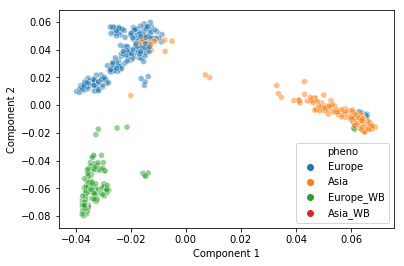

In [18]:
ax = sns.scatterplot(x=df_merge_col.iloc[:,2], y=df_merge_col.iloc[:,3], hue=df_merge_col.iloc[:,22], data=df_merge_col, alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

fig = ax.get_figure()
fig.savefig('/path/PCA.pdf')

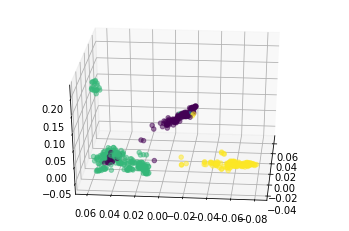

In [19]:
from mpl_toolkits.mplot3d import Axes3D
# plot
my_color=pd.Categorical(df_merge_col.iloc[:,22]).codes


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_merge_col.iloc[:,2], df_merge_col.iloc[:,3], df_merge_col.iloc[:,4], c=my_color, alpha=0.5)
ax.view_init(30, 185)
plt.show()

fig = ax.get_figure()
fig.savefig('/path/PCA3D.pdf')